In [1]:
import pandas as pd
import warnings as warn
warn.filterwarnings('ignore')

In [2]:
dffd = pd.read_csv('preprocessed_data.csv')
dffd

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_days,incident_days
0,328,48,2,1,1000,1406.91,0,1,4,2,...,71610,6510,13020,52080,10,1,2004,1,16360,16460
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,5070,780,780,3510,8,12,2007,1,13326,16456
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,34650,7700,3850,23100,4,30,2007,0,11206,16488
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,63400,6340,6340,50720,3,34,2014,1,7449,16445
4,256,39,2,1,1000,1351.10,0,0,6,12,...,64100,6410,6410,51280,10,3,2003,1,13433,16437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,3,38,2,2,1000,1310.80,0,0,5,2,...,87200,17440,8720,61040,6,6,2006,0,7866,16488
905,285,41,0,0,1000,1436.79,0,0,6,9,...,108480,18080,18080,72320,13,28,2015,0,16075,16459
906,130,34,2,1,500,1383.49,3000000,0,5,1,...,67500,7500,7500,52500,11,19,1996,0,12100,16458
907,458,62,0,2,2000,1356.92,5000000,1,0,5,...,46980,5220,5220,36540,1,5,1998,0,15296,16492


In [3]:
dffd['fraud_reported'].value_counts()

,count
fraud_reported,
0,668
1,241


In [4]:
Xfd = dffd.drop('fraud_reported', axis=1)
yfd = dffd['fraud_reported']

Least Absolute Shrinkage and Selection Operator (LASSO)

In [5]:
from sklearn.linear_model import Lasso
import numpy as np

##initialising and fitting the model
lasso_mdl = Lasso()
lasso_mdl.fit(Xfd, yfd)
lasso_coeff = np.abs(lasso_mdl.coef_)

# RFE with the top 18 features
ft_chosen_indics = np.argsort(lasso_coeff)[-18:]
ft_chosen = Xfd.columns[ft_chosen_indics]

print("Selected features using LASSO:", ft_chosen.tolist())

Selected features using LASSO: ['police_report_available', 'auto_make', 'auto_model', 'property_damage', 'number_of_vehicles_involved', 'bodily_injuries', 'auto_year', 'incident_days', 'umbrella_limit', 'capital-loss', 'capital-gains', 'property_claim', 'policy_bind_days', 'total_claim_amount', 'vehicle_claim', 'injury_claim', 'policy_deductable', 'policy_annual_premium']


In [6]:
chosenX = Xfd[ft_chosen]
chosenX

,police_report_available,auto_make,auto_model,property_damage,number_of_vehicles_involved,bodily_injuries,auto_year,incident_days,umbrella_limit,capital-loss,capital-gains,property_claim,policy_bind_days,total_claim_amount,vehicle_claim,injury_claim,policy_deductable,policy_annual_premium
0,2,10,1,2,1,1,2004,16460,0,0,53300,13020,16360,71610,52080,6510,1000,1406.91
1,0,8,12,0,1,0,2007,16456,5000000,0,0,780,13326,5070,3510,780,2000,1197.22
2,1,4,30,1,3,2,2007,16488,5000000,0,35100,3850,11206,34650,23100,7700,2000,1413.14
3,1,3,34,0,1,1,2014,16445,6000000,-62400,48900,6340,7449,63400,50720,6340,2000,1415.74
4,1,10,3,1,3,0,2003,16437,0,0,0,6410,13433,64100,51280,6410,1000,1351.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0,6,6,2,1,0,2006,16488,0,0,0,8720,7866,87200,61040,17440,1000,1310.80
905,0,13,28,2,1,2,2015,16459,0,0,70900,18080,16075,108480,72320,18080,1000,1436.79
906,2,11,19,0,3,2,1996,16458,3000000,0,35100,7500,12100,67500,52500,7500,500,1383.49
907,2,1,5,0,1,0,1998,16492,5000000,0,0,5220,15296,46980,36540,5220,2000,1356.92


Data balancing - SMOTE

In [7]:
from imblearn.over_sampling import SMOTE as smtfd
from collections import Counter as cntfd

sm = smtfd()
Xfd_resam, yfd_resam = sm.fit_resample(chosenX, yfd)

print("Imbalanced distribution of data:", cntfd(yfd))
print("Balanced distribution of data:", cntfd(yfd_resam))

Imbalanced distribution of data: Counter({0: 668, 1: 241})
Balanced distribution of data: Counter({1: 668, 0: 668})


Data splitting - Train = 60%, Val. = 20%, Test = 20%

In [8]:
from sklearn.model_selection import train_test_split as fdtts

IX_tran, IX_tem, Iy_tran, Iy_tem = fdtts(Xfd_resam, yfd_resam, test_size=0.4, random_state=2)
IX_val, IX_tst, Iy_val, Iy_tst = fdtts(IX_tem, Iy_tem, test_size=0.5, random_state=2)

print(f"Samples for the training : {IX_tran.shape}")
print(f"Samples for the validation: {IX_val.shape}")
print(f"Samples for the testing: {IX_tst.shape}")

Samples for the training : (801, 18)
Samples for the validation: (267, 18)
Samples for the testing: (268, 18)


In [9]:
from sklearn.model_selection import GridSearchCV as fd_grid
from sklearn.metrics import classification_report as fd_reprt
import time as fd_tme
from sklearn.metrics import mean_squared_error as fd_mse
from sklearn.metrics import confusion_matrix as fd_matrx
from sklearn.metrics import ConfusionMatrixDisplay as fd_matrx_dsply

XGBoost

In [10]:
from xgboost import XGBClassifier as XGBC

MDL = XGBC()
pmfd = {'n_estimators': [20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]}

pm = fd_grid(estimator=MDL, param_grid=pmfd, scoring='accuracy', cv=2, verbose=1)
pm.fit(IX_tran, Iy_tran)
bst_pms = pm.best_params_
print("\nOptimal parameters of XGB:")
print(bst_pms)

Fitting 2 folds for each of 81 candidates, totalling 162 fits

Optimal parameters of XGB:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}



Training period: 0.09664082527160645 sec.
Training accuracy: 0.9975031210986267
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       125
           1       0.82      0.78      0.80       142

    accuracy                           0.79       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.79      0.79       267


Validation period: 0.015796422958374023 sec.
Val. MSE: 0.20599250936329588


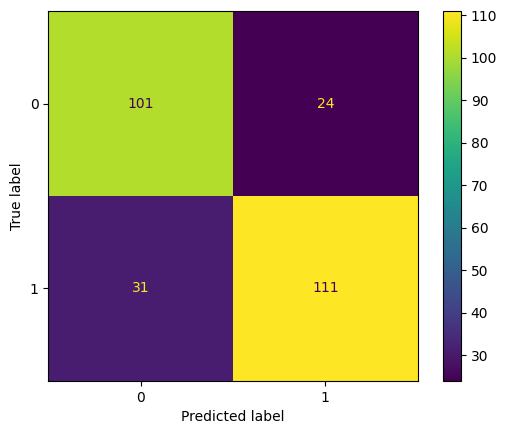

In [11]:
ST = fd_tme.time()
MDL_bst = XGBC(**bst_pms)
MDL_bst.fit(IX_tran, Iy_tran)
ED = fd_tme.time()
T = ED - ST
print(f"\nTraining period: {T} sec.")
Acc = MDL_bst.score(IX_tran, Iy_tran)
print(f"Training accuracy: {Acc}")


ST = fd_tme.time()
Predt_Val = MDL_bst.predict(IX_val)
Probb_Val  = MDL_bst.predict_proba(IX_val)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_val, Predt_Val))
print(f"\nValidation period: {T} sec.")
MSEval = fd_mse(Iy_val, Predt_Val)
print("Val. MSE:", MSEval)
Matx = fd_matrx(Iy_val, Predt_Val)
fd_matrx_dsply(confusion_matrix=Matx).plot()

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       141
           1       0.70      0.69      0.70       127

    accuracy                           0.72       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.72      0.72      0.72       268


Testing period: 0.02005600929260254 sec.
Test MSE: 0.2835820895522388


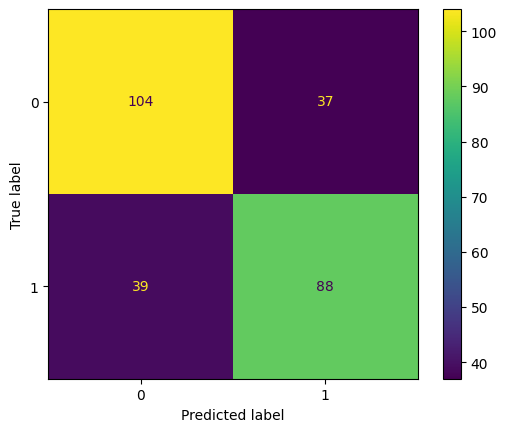

In [12]:
ST = fd_tme.time()
Predt_tst = MDL_bst.predict(IX_tst)
Probb_tst  = MDL_bst.predict_proba(IX_tst)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_tst, Predt_tst))
print(f"\nTesting period: {T} sec.")
MSEtst = fd_mse(Iy_tst, Predt_tst)
print("Test MSE:", MSEtst)
Matx = fd_matrx(Iy_tst, Predt_tst)
fd_matrx_dsply(confusion_matrix=Matx).plot()

Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC

MDL = RFC()
pmfd = {'n_estimators': [20, 50, 100],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

pm = fd_grid(estimator=MDL, param_grid=pmfd, scoring='accuracy', cv=2, verbose=1)
pm.fit(IX_tran, Iy_tran)
bst_pms = pm.best_params_
print("\nOptimal parameters of RF:")
print(bst_pms)

Fitting 2 folds for each of 162 candidates, totalling 324 fits

Optimal parameters of RF:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}



Training period: 0.07685184478759766 sec.
Training accuracy: 0.850187265917603
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       125
           1       0.69      0.75      0.72       142

    accuracy                           0.69       267
   macro avg       0.69      0.69      0.69       267
weighted avg       0.69      0.69      0.69       267


Validation period: 0.010576248168945312 sec.
Val. MSE: 0.31086142322097376


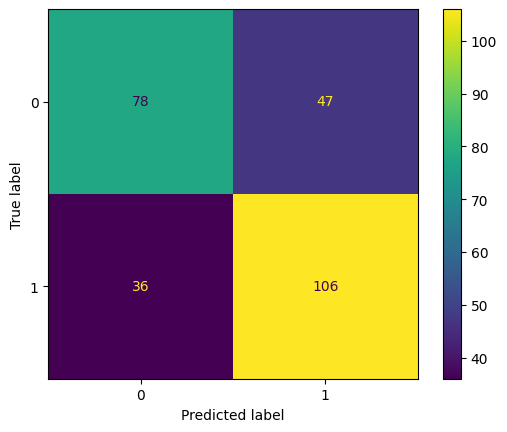

In [14]:
ST = fd_tme.time()
MDL_bst = RFC(**bst_pms)
MDL_bst.fit(IX_tran, Iy_tran)
ED = fd_tme.time()
T = ED - ST
print(f"\nTraining period: {T} sec.")
Acc = MDL_bst.score(IX_tran, Iy_tran)
print(f"Training accuracy: {Acc}")

ST = fd_tme.time()
Predt_Val = MDL_bst.predict(IX_val)
Probb_Val  = MDL_bst.predict_proba(IX_val)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_val, Predt_Val))
print(f"\nValidation period: {T} sec.")
MSEval = fd_mse(Iy_val, Predt_Val)
print("Val. MSE:", MSEval)
Matx = fd_matrx(Iy_val, Predt_Val)
fd_matrx_dsply(confusion_matrix=Matx).plot()

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       141
           1       0.62      0.65      0.64       127

    accuracy                           0.65       268
   macro avg       0.65      0.65      0.65       268
weighted avg       0.65      0.65      0.65       268


Testing period: 0.011433124542236328 sec.
Test MSE: 0.35074626865671643


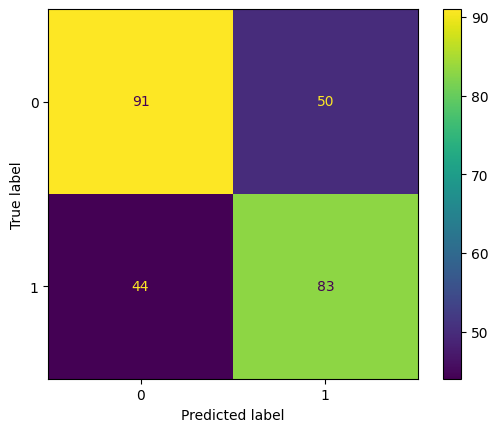

In [15]:
ST = fd_tme.time()
Predt_tst = MDL_bst.predict(IX_tst)
Probb_tst  = MDL_bst.predict_proba(IX_tst)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_tst, Predt_tst))
print(f"\nTesting period: {T} sec.")
MSEtst = fd_mse(Iy_tst, Predt_tst)
print("Test MSE:", MSEtst)
Matx = fd_matrx(Iy_tst, Predt_tst)
fd_matrx_dsply(confusion_matrix=Matx).plot()

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression as LRC

MDL = LRC()
pmfd = {'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2', 'elasticnet', None]}

pm = fd_grid(estimator=MDL, param_grid=pmfd, scoring='accuracy', cv=2, verbose=1)
pm.fit(IX_tran, Iy_tran)
bst_pms = pm.best_params_
print("\nOptimal parameters of LR:")
print(bst_pms)

Fitting 2 folds for each of 48 candidates, totalling 96 fits

Optimal parameters of LR:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}



Training period: 0.016384124755859375 sec.
Training accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       125
           1       0.68      0.62      0.65       142

    accuracy                           0.64       267
   macro avg       0.65      0.65      0.64       267
weighted avg       0.65      0.64      0.64       267


Validation period: 0.0044782161712646484 sec.
Val. MSE: 0.35580524344569286


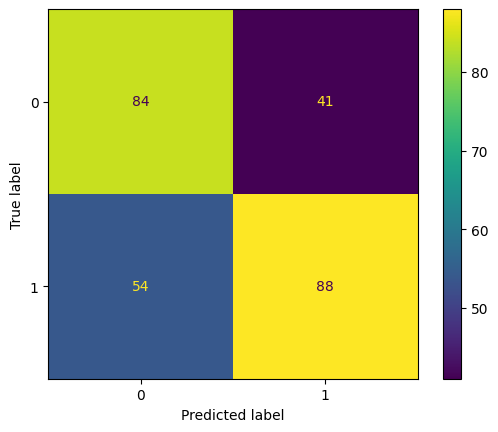

In [17]:
ST = fd_tme.time()
MDL_bst = LRC(**bst_pms)
MDL_bst.fit(IX_tran, Iy_tran)
ED = fd_tme.time()
T = ED - ST
print(f"\nTraining period: {T} sec.")
Acc = MDL_bst.score(IX_tran, Iy_tran)
print(f"Training accuracy: {Acc}")

ST = fd_tme.time()
Predt_Val = MDL_bst.predict(IX_val)
Probb_Val  = MDL_bst.predict_proba(IX_val)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_val, Predt_Val))
print(f"\nValidation period: {T} sec.")
MSEval = fd_mse(Iy_val, Predt_Val)
print("Val. MSE:", MSEval)
Matx = fd_matrx(Iy_val, Predt_Val)
fd_matrx_dsply(confusion_matrix=Matx).plot()

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       141
           1       0.58      0.65      0.61       127

    accuracy                           0.61       268
   macro avg       0.61      0.61      0.61       268
weighted avg       0.62      0.61      0.61       268


Testing period: 0.004103422164916992 sec.
Test MSE: 0.3880597014925373


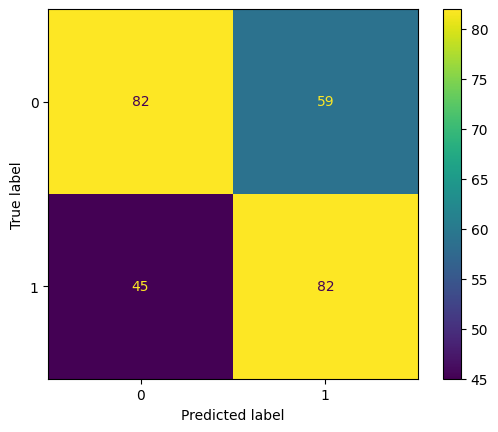

In [18]:
ST = fd_tme.time()
Predt_tst = MDL_bst.predict(IX_tst)
Probb_tst  = MDL_bst.predict_proba(IX_tst)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_tst, Predt_tst))
print(f"\nTesting period: {T} sec.")
MSEtst = fd_mse(Iy_tst, Predt_tst)
print("Test MSE:", MSEtst)
Matx = fd_matrx(Iy_tst, Predt_tst)
fd_matrx_dsply(confusion_matrix=Matx).plot()